In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc

In [2]:
#檢查空值
df = pd.read_csv("HW2_heart_2020_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
HeartDisease        319795 non-null object
BMI                 319795 non-null float64
Smoking             319795 non-null object
AlcoholDrinking     319795 non-null object
Stroke              319795 non-null object
PhysicalHealth      319795 non-null float64
MentalHealth        319795 non-null float64
DiffWalking         319795 non-null object
Sex                 319795 non-null object
AgeCategory         319795 non-null object
Race                319795 non-null object
Diabetic            319795 non-null object
PhysicalActivity    319795 non-null object
GenHealth           319795 non-null object
SleepTime           319795 non-null float64
Asthma              319795 non-null object
KidneyDisease       319795 non-null object
SkinCancer          319795 non-null object
dtypes: float64(4), object(14)
memory usage: 43.9+ MB


In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
#敘述性統計
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
#分數值及分類資料
num = df.select_dtypes(exclude=['object'])
num.head()
cat = df.select_dtypes(include=['object'])
cat.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [6]:
#看分類項都分幾類
cat.nunique()

HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

In [7]:
#先把好換成0&1的先換掉
cat_new = cat[cat.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1 })
cat_new['HeartDisease'] = cat_new['HeartDisease'].astype(float)
cat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
HeartDisease        319795 non-null float64
Smoking             319795 non-null int64
AlcoholDrinking     319795 non-null int64
Stroke              319795 non-null int64
DiffWalking         319795 non-null int64
Sex                 319795 non-null int64
AgeCategory         319795 non-null object
Race                319795 non-null object
Diabetic            319795 non-null int64
PhysicalActivity    319795 non-null int64
GenHealth           319795 non-null object
Asthma              319795 non-null int64
KidneyDisease       319795 non-null int64
SkinCancer          319795 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 34.2+ MB


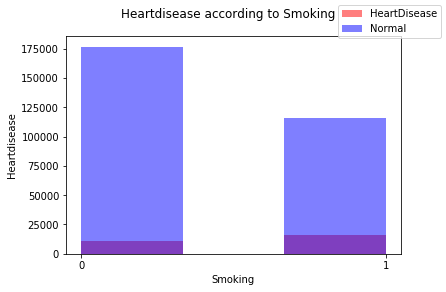

In [8]:
#抽菸和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["Smoking"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["Smoking"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to Smoking")

fig.legend()
#有抽菸的患病人數較高

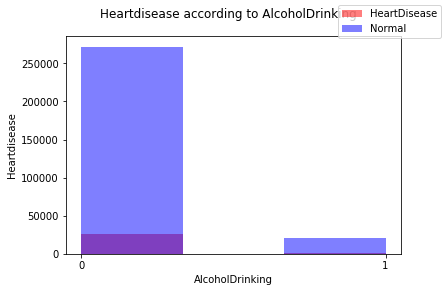

In [9]:
#喝酒和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["AlcoholDrinking"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["AlcoholDrinking"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to AlcoholDrinking")

fig.legend()
#好像比較沒關係

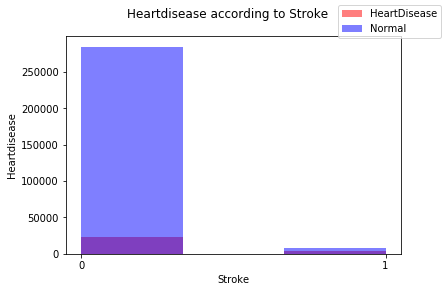

In [10]:
#中風和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["Stroke"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["Stroke"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to Stroke")

fig.legend()
#雖然沒中風患心臟病的人數較多，但有中風的人中，心臟病人數佔一半左右

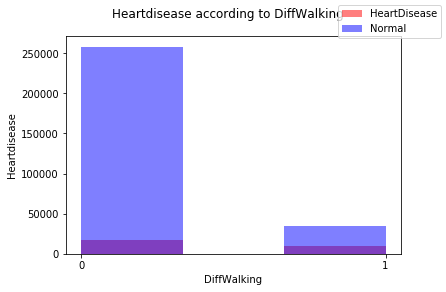

In [11]:
#行動方便與否和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["DiffWalking"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["DiffWalking"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to DiffWalking")

fig.legend()
#無行動方便與否問題的人患心臟病人數反而較高

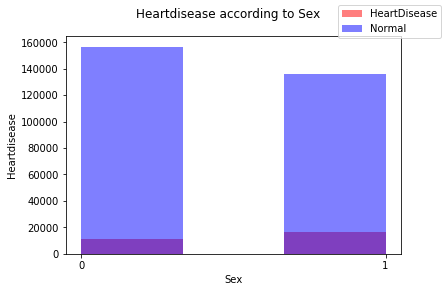

In [12]:
#性別和心臟病的關係，男=1,女=0
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["Sex"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["Sex"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to Sex")

fig.legend()
#男患病高於女(人數較少患病率甚至還是比較高)

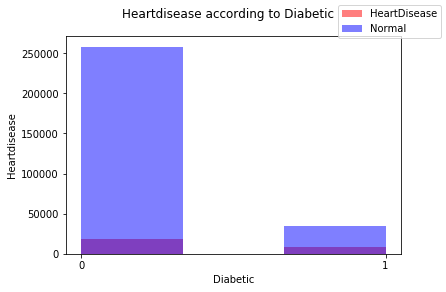

In [13]:
#糖尿病和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["Diabetic"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["Diabetic"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to Diabetic")

fig.legend()
#無糖尿病的人反而患心臟病數較高

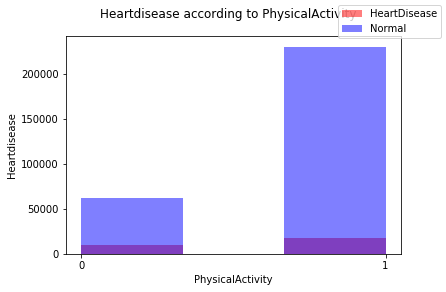

In [14]:
#有在運動和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["PhysicalActivity"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["PhysicalActivity"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to PhysicalActivity")

fig.legend()
#在運動的反而患病人數較高

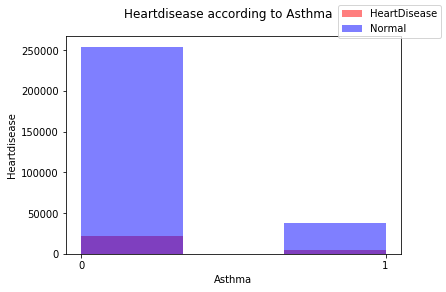

In [15]:
#哮喘和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["Asthma"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["Asthma"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("Asthma")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to Asthma")

fig.legend()
#沒有哮喘的人患病比例較高

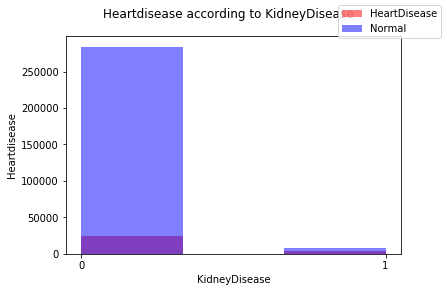

In [16]:
#腎臟疾病和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["KidneyDisease"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["KidneyDisease"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to KidneyDisease")

fig.legend()
#雖無患病人數較高，但有患病的人中，快佔一半都有心臟病

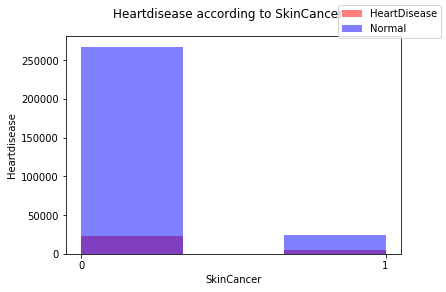

In [17]:
#皮膚癌和心臟病的關係
fig, ax = plt.subplots()

ax.hist(cat_new[cat_new["HeartDisease"]==1]["SkinCancer"],bins = 3,alpha=0.5, color="red",label="HeartDisease")
ax.hist(cat_new[cat_new["HeartDisease"]==0]["SkinCancer"],bins = 3,alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Heartdisease")
ax.xaxis.set_major_locator(MaxNLocator(1)) 
fig.suptitle("Heartdisease according to SkinCancer")

fig.legend()
#未有皮膚癌的好像心臟病比例較高

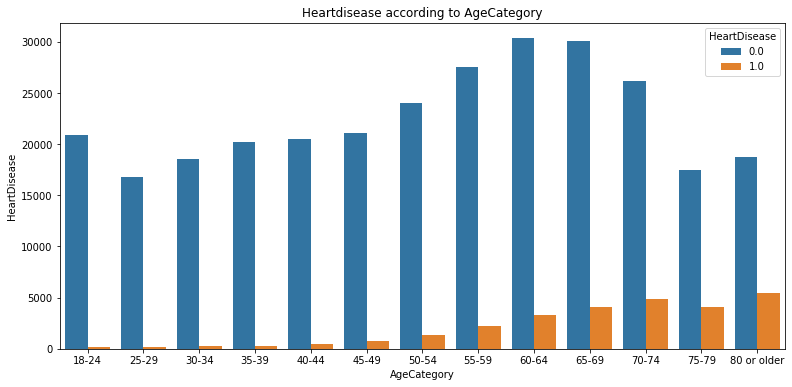

In [147]:
#年齡分布和心臟病的關係
plt.figure(figsize = (13,6))
sns.countplot(x = cat_new['AgeCategory'], hue = 'HeartDisease', data = cat_new, order=['18-24', '25-29', '30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'])
fig.suptitle("HeartDisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('HeartDisease')
plt.title("Heartdisease according to AgeCategory")
plt.show()
#老年人較容易得

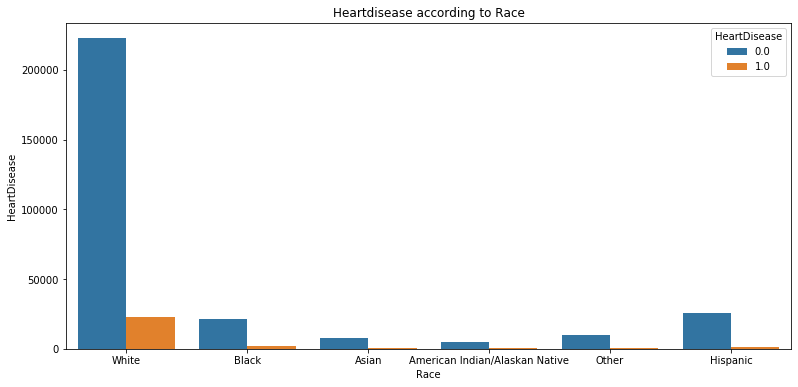

In [148]:
#種族和心臟病的關係
plt.figure(figsize = (13,6))
sns.countplot( x= cat_new['Race'], hue = 'HeartDisease', data = cat_new)
plt.xlabel('Race')
plt.ylabel('HeartDisease')
plt.title("Heartdisease according to Race")
plt.show()
#白人好像比較容易得

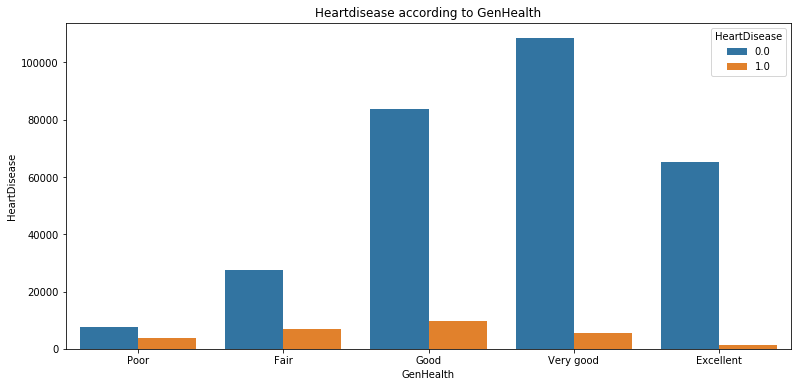

In [149]:
#GenHealth和心臟病的關係
plt.figure(figsize = (13,6))
sns.countplot( x= cat_new['GenHealth'], hue = 'HeartDisease', data = cat_new, order=['Poor', 'Fair', 'Good','Very good','Excellent'])
plt.xlabel('GenHealth')
plt.ylabel('HeartDisease')
plt.title("Heartdisease according to GenHealth")
plt.show()

C:\Users\Erin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,HeartDisease
SleepTime,0.008327
MentalHealth,0.028591
BMI,0.051803
PhysicalHealth,0.170721
HeartDisease,1.000000


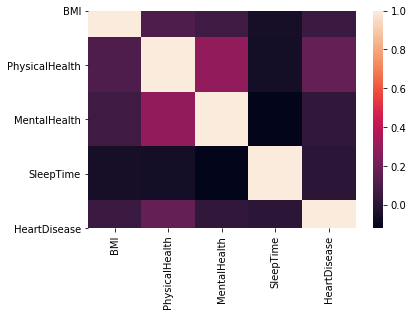

In [21]:
#數值資料和心臟病的關聯
num['HeartDisease']=cat_new['HeartDisease']
num_corr = num.corr()
sns.heatmap(num_corr)
corr = num_corr['HeartDisease']
pd.DataFrame(corr).sort_values('HeartDisease')

In [44]:
#標準化
Scaler = StandardScaler()
num_sd = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
df[num_sd] = Scaler.fit_transform(df[num_sd])
num_new = df[num_sd]
num_new.head()

,MentalHealth,BMI,PhysicalHealth,SleepTime
0,3.281069,-1.844750,-0.046751,-1.460354
1,-0.490039,-1.256338,-0.424070,-0.067601
2,3.281069,-0.274603,2.091388,0.628776
3,-0.490039,-0.647473,-0.424070,-0.763977
4,-0.490039,-0.726138,3.097572,0.628776


In [40]:
#分較多類的變虛擬變數
cat_dum = cat_new.loc[:,['GenHealth','Race','AgeCategory']]
dummies = pd.get_dummies(cat_dum,drop_first=True)
dummies.head()  

,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,AgeCategory_25-29,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [82]:
#分訓練和測試集
cat_test = cat_new.select_dtypes(include=['int64'])
cat_test.drop(columns = ['AlcoholDrinking'])#把好像沒關係的去掉
X = pd.concat([cat_test,num_new,dummies], axis=1)
Y = cat_new['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [95]:
#邏輯回歸
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.score(X_test, y_test)

y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\Erin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     58512
         1.0       0.53      0.10      0.17      5447

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.92      0.89     63959



In [88]:
#SVM
scale = StandardScaler().fit(X_train)
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

svm = LinearSVC(max_iter=1500)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     58512
         1.0       0.59      0.04      0.08      5447

    accuracy                           0.92     63959
   macro avg       0.75      0.52      0.52     63959
weighted avg       0.89      0.92      0.88     63959



C:\Users\Erin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [103]:
#隨機森林
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\Erin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     58512
         1.0       0.33      0.12      0.17      5447

    accuracy                           0.90     63959
   macro avg       0.62      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



In [110]:
#KNN
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train,y_train)

predicted = knnModel.predict(X_train)
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

訓練集:  0.9342469394455823
測試集:  0.8997951812880126


In [111]:
y_pred = knnModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     58512
         1.0       0.31      0.14      0.19      5447

    accuracy                           0.90     63959
   macro avg       0.62      0.56      0.57     63959
weighted avg       0.87      0.90      0.88     63959



In [144]:
pipe_lr = make_pipeline(StandardScaler(), 
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_score1 = pipe_lr.decision_function(X_test)
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)
roc_auc1

0.8383702211014545

In [136]:
pipe_lr = make_pipeline(StandardScaler(), 
                        svm)
pipe_lr.fit(X_train, y_train)
y_score2 = pipe_lr.decision_function(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.8365524364122534

In [137]:
pipe_lr = make_pipeline(StandardScaler(), 
                        clf)
pipe_lr.fit(X_train, y_train)
y_score3 = pipe_lr.predict(X_test)
fpr3, tpr3, _ = roc_curve(y_test, y_score3)
roc_auc3 = auc(fpr3, tpr3)
roc_auc3

0.5480702305744988

In [129]:
pipe_lr = make_pipeline(StandardScaler(), 
                        knnModel)
pipe_lr.fit(X_train, y_train)
y_score = pipe_lr.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
roc_auc

0.5704188791772197

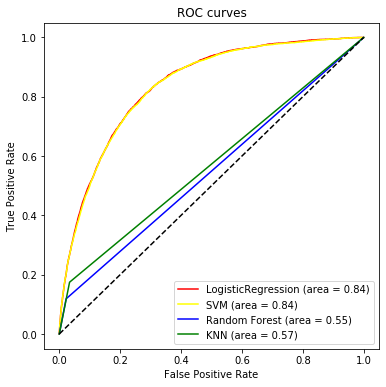

In [150]:
#ROC曲線
plt.figure(figsize = (6,6))
plt.plot(fpr1, tpr1, color='red',label='LogisticRegression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='yellow',label='SVM (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='blue',label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr, tpr, color='green',label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")